In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
df = pd.read_csv(r"C:\Users\USER\Pandu\Jupyter\host_train.csv")

In [27]:
df

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [28]:
df.dropna(inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
features = ['case_id','Hospital','Available_Extra_Rooms_in_Hospital','Hospital_city']
x = df.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [31]:
x

array([[-1.72871456, -1.19607352, -0.16817845, -0.57300555],
       [-1.72870368, -1.89103285, -1.02440008,  0.07148385],
       [-1.72869281, -0.96442042, -1.02440008, -1.21749494],
       ...,
       [ 1.73481834, -1.31190008, -0.16817845, -0.25076085],
       [ 1.73482922, -0.84859386, -0.16817845, -0.89525024],
       [ 1.7348401 ,  0.07801856,  1.54426482,  0.71597324]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['komponen1','komponen2'])

In [33]:
principalDf

,komponen1,komponen2
0,0.517688,-1.927479
1,0.215765,-2.106557
2,0.380078,-2.483773
3,-0.975449,-1.958350
4,-0.975446,-1.958342
...,...,...
313788,1.098685,1.184990
313789,0.354053,0.585274
313790,1.399922,0.924544
313791,1.482080,0.735940


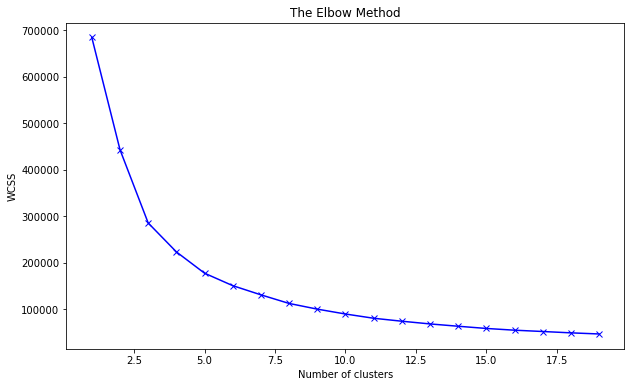

In [34]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(principalDf)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(10,6))
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
new_dfoutlier_std = pd.DataFrame(data=principalDf, columns=principalDf.columns)
new_dfoutlier_std

,komponen1,komponen2
0,0.517688,-1.927479
1,0.215765,-2.106557
2,0.380078,-2.483773
3,-0.975449,-1.958350
4,-0.975446,-1.958342
...,...,...
313788,1.098685,1.184990
313789,0.354053,0.585274
313790,1.399922,0.924544
313791,1.482080,0.735940


n_clusters = 4


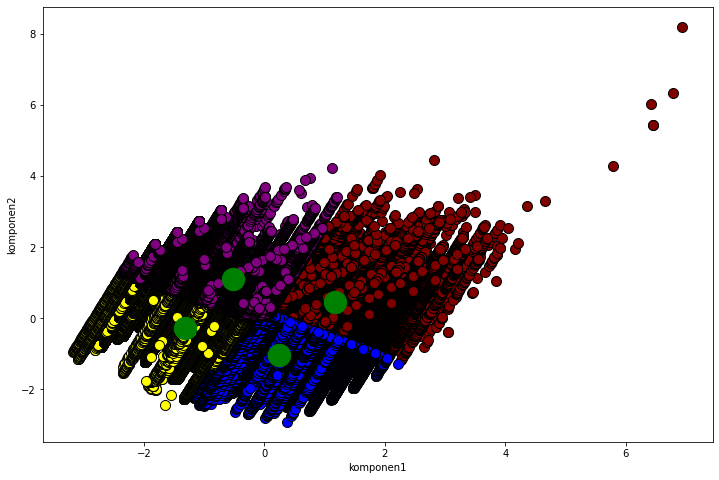

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(principalDf)
labels = kmeans.labels_
new_dfoutlier_std['labels_kmeans'] = labels

plt.subplots(figsize=(12,8))
print('n_clusters = 4')
plt.scatter(new_dfoutlier_std.komponen1[new_dfoutlier_std.labels_kmeans == 0],
            new_dfoutlier_std.komponen2[new_dfoutlier_std.labels_kmeans == 0],
            c='maroon', s=100, edgecolor='black', linestyle='-')
plt.scatter(new_dfoutlier_std.komponen1[new_dfoutlier_std.labels_kmeans == 1],
            new_dfoutlier_std.komponen2[new_dfoutlier_std.labels_kmeans == 1],
            c='blue', s=100, edgecolor='black', linestyle='-')
plt.scatter(new_dfoutlier_std.komponen1[new_dfoutlier_std.labels_kmeans == 2],
            new_dfoutlier_std.komponen2[new_dfoutlier_std.labels_kmeans == 2],
            c='yellow', s=100, edgecolor='black', linestyle='-')
plt.scatter(new_dfoutlier_std.komponen1[new_dfoutlier_std.labels_kmeans == 3],
            new_dfoutlier_std.komponen2[new_dfoutlier_std.labels_kmeans == 3],
            c='purple', s=100, edgecolor='black', linestyle='-')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=500)
plt.xlabel('komponen1')
plt.ylabel('komponen2')
plt.show()

MemoryError: Unable to allocate 367. GiB for an array with shape (49232866528,) and data type float64

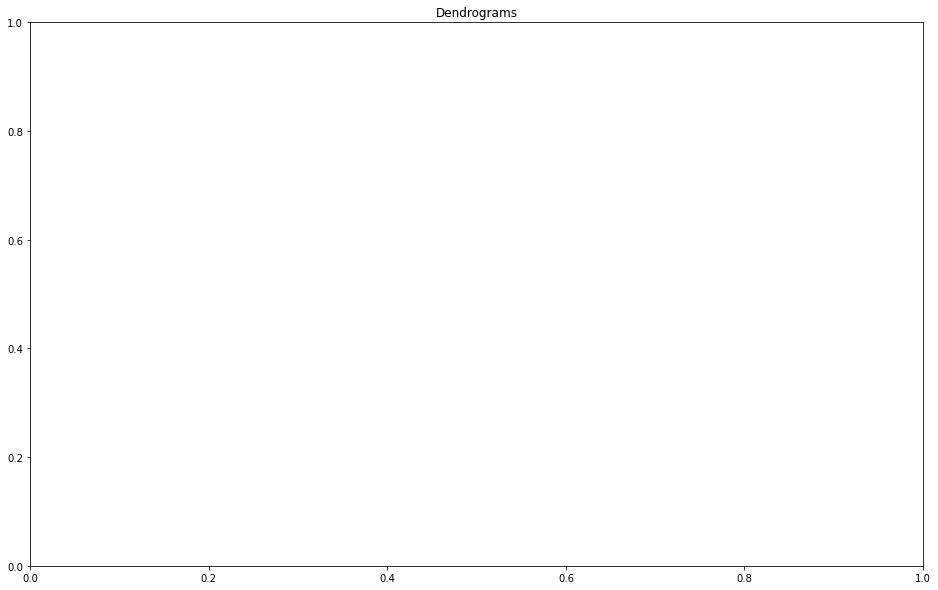

In [37]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(principalDf)

In [ ]:
plt.scatter(principalDf['komponen1'], principalDf['komponen2'], c=cluster.labels_) 

In [ ]:
import sklearn.metrics as metrics

for i in range(2,20):
    labels_silhouette = KMeans(n_clusters=i, init="k-means++", random_state=42).fit(principalDf).labels_
    print('Silhouette score for k(clusters) = ' + str(i) + ' is '
         +str(metrics.silhouette_score(principalDf, labels_silhouette, metric="euclidean", sample_size=440, random_state=42)))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestCentroid

X = principalDf.iloc[:].values


print("[Agglomerative Method]")

for i in range(2,20):
  clusterer = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
  y_predict = clusterer.fit_predict(X)
  cluster_labels = clusterer.labels_

  clf = NearestCentroid()
  clf.fit(X, y_predict)

  print("Silhoutte score for k(cluster) =",i,"is",silhouette_score(X, cluster_labels))